### About The Data

The data set consists of information on credit card transactions.

As per the data description:

1. PCA has been applied to it, accept for the time and amount columns.
2. The features have been scaled (a pre-requisite for PCA) to protect privacy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Importing libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Libraries for metrics and other functions
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# Finding the percentage of each of the classes

print('No Frauds: ', round(df['Class'].value_counts()[0]/len(df)*100,2),'%')
print('Frauds: ',round(df['Class'].value_counts()[1]/len(df)*100,2),'%')

No Frauds:  99.83 %
Frauds:  0.17 %


Since only Amount and Time variables are known, we can see their distribution to find whether the values are skewed.

In [11]:
min(df['Amount'])

0.0

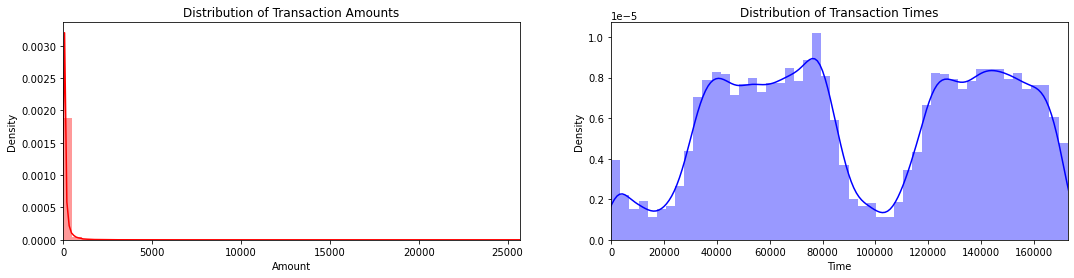

In [12]:
fig,ax=plt.subplots(1,2,figsize=(18,4))

#amount_val=df['Amount'].values
#time_val=df['time'].values

sns.distplot(df['Amount'],ax=ax[0],color='r')
ax[0].set_title('Distribution of Transaction Amounts')
ax[0].set_xlim([min(df['Amount']),max(df['Amount'])])

sns.distplot(df['Time'],ax=ax[1],color='b')
ax[1].set_title('Distribution of Transaction Times')
ax[1].set_xlim([min(df['Time']),max(df['Time'])])

plt.show()

### Scaling and Distribution

The time and amount columns should also be scaled like the other variables. However, for the algorithm to better understand the underlying data patterns, there should be a subsample of it containing equal amount of fraud and non-fraud transactions.

### Why is subsampling needed?

1. To avoid overfitting the data and wrongly classify all transactions as non-fraud. Ideally, the algorithm should be certain of a fraud transaction whenever it occurs.
2. If imbalanced dataset is used, the influence of the other variables (even if we don't know what they are) on the class (fraud/non-fraud) will not be known, or in other words, their true correlations cannot be ascertained.

In [13]:
from sklearn.preprocessing import StandardScaler,RobustScaler

# RobustScaler performs better with outliers

std_scaler=StandardScaler()
rob_scaler=RobustScaler()

df['scaled_amount']=rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time']=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis=1,inplace=True)

In [14]:
# Reordering the indices of scaled amount and scaled time

scaled_amount=df['scaled_amount']
scaled_time=df['scaled_time']

df.drop(['scaled_amount','scaled_time'],axis=1,inplace=True)

df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'scaled_time',scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Now the original dataset will be split into samples for random undersampling and oversampling. These will contain equal data points for both classes. The model will be fitted on these samples and then fitted on the original data frame which will be the test set.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
X=df.drop('Class', axis=1)
y=df['Class']

In [17]:
sss=StratifiedKFold(n_splits=5,random_state=None,shuffle=False)
for train_index, test_index in sss.split(X,y):
    print('Train: ',train_index, 'Test: ',test_index)
    original_Xtrain, original_Xtest= X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest= y.iloc[train_index], y.iloc[test_index]
    # The 'original' keyword is used to distinguish this from the under sampled sets X_train, y_train etc.
# Converting into arrays
original_Xtrain=original_Xtrain.values
original_Xtest=original_Xtest.values
original_ytrain=original_ytrain.values
original_ytest=original_ytest.values

# Checking to see if the class labels are equally distributed in the training and test set
unique_train_label, train_counts_label=np.unique(original_ytrain,return_counts=True)
unique_test_label, test_counts_label=np.unique(original_ytest,return_counts=True)
print()
print('Distribution of Labels:\n ')
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

Train:  [ 30473  30496  31002 ... 284804 284805 284806] Test:  [    0     1     2 ... 57017 57018 57019]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 30473  30496  31002 ... 113964 113965 113966]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 81609  82400  83053 ... 170946 170947 170948]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [150654 150660 150661 ... 227866 227867 227868]
Train:  [     0      1      2 ... 227866 227867 227868] Test:  [212516 212644 213092 ... 284804 284805 284806]

Distribution of Labels:
 
[0.99827076 0.00172924]
[0.99827952 0.00172048]


we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.
Steps:

    The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
    
    Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases  of fraud and 492 cases of non-fraud transactions.
    
    After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [18]:
# Making a sample consisting of equal classes of fraud and non-fraud cases
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
df=df.sample(frac=1)


In [20]:
fraud_df=df.loc[df['Class']==1]
non_fraud_df=df.loc[df['Class']==0][:492]
normal_distributed_df=pd.concat([fraud_df,non_fraud_df])

# Shuffle the rows of dataframes
new_df=normal_distributed_df.sample(frac=1,random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
252841,-0.167680,0.837651,1.970897,-0.411389,-0.416419,0.090581,-0.464942,-0.050955,-0.695559,0.095550,...,-0.099780,0.234309,0.767257,0.210779,0.832508,-0.347980,0.593572,-0.040937,-0.049381,0
112840,0.321805,-0.139428,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,...,-0.510614,0.862913,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335,1
283244,0.970446,1.019455,1.910501,-1.370503,-0.075401,-0.449043,-1.479684,0.095431,-1.339267,0.185601,...,-0.423263,-0.249796,-0.337818,0.273098,-0.431237,-0.734112,0.485291,-0.008797,-0.033705,0
245556,4.694334,0.800174,1.322724,-0.843911,-2.096888,0.759759,-0.196377,-1.166353,0.482534,-0.349791,...,0.585435,0.133815,-0.121562,-0.208574,-0.254752,-0.098324,-0.613874,0.002654,0.072386,1
204064,4.513379,0.592147,0.232512,0.938944,-4.647780,3.079844,-1.902655,-1.041408,-1.020407,0.547069,...,1.141615,0.911373,1.042929,0.999394,0.901260,-0.452093,0.192959,0.180859,-0.029315,1


### Data Preprocessing and Analysis

Since the data is now balanced, further analysis can be done

In [21]:
print('Distribution of classes in the shuffled randomly undersampled dataset:')
print()
print('Fraud:',(new_df['Class'].value_counts()[1]/len(new_df))*100,'%')
print('Non-fraud:',(new_df['Class'].value_counts()[0]/len(new_df))*100,'%')

Distribution of classes in the shuffled randomly undersampled dataset:

Fraud: 50.0 %
Non-fraud: 50.0 %


Correlation analysis

Text(0.5, 1.0, 'Subsample Correlation Matrix \n Use for reference')

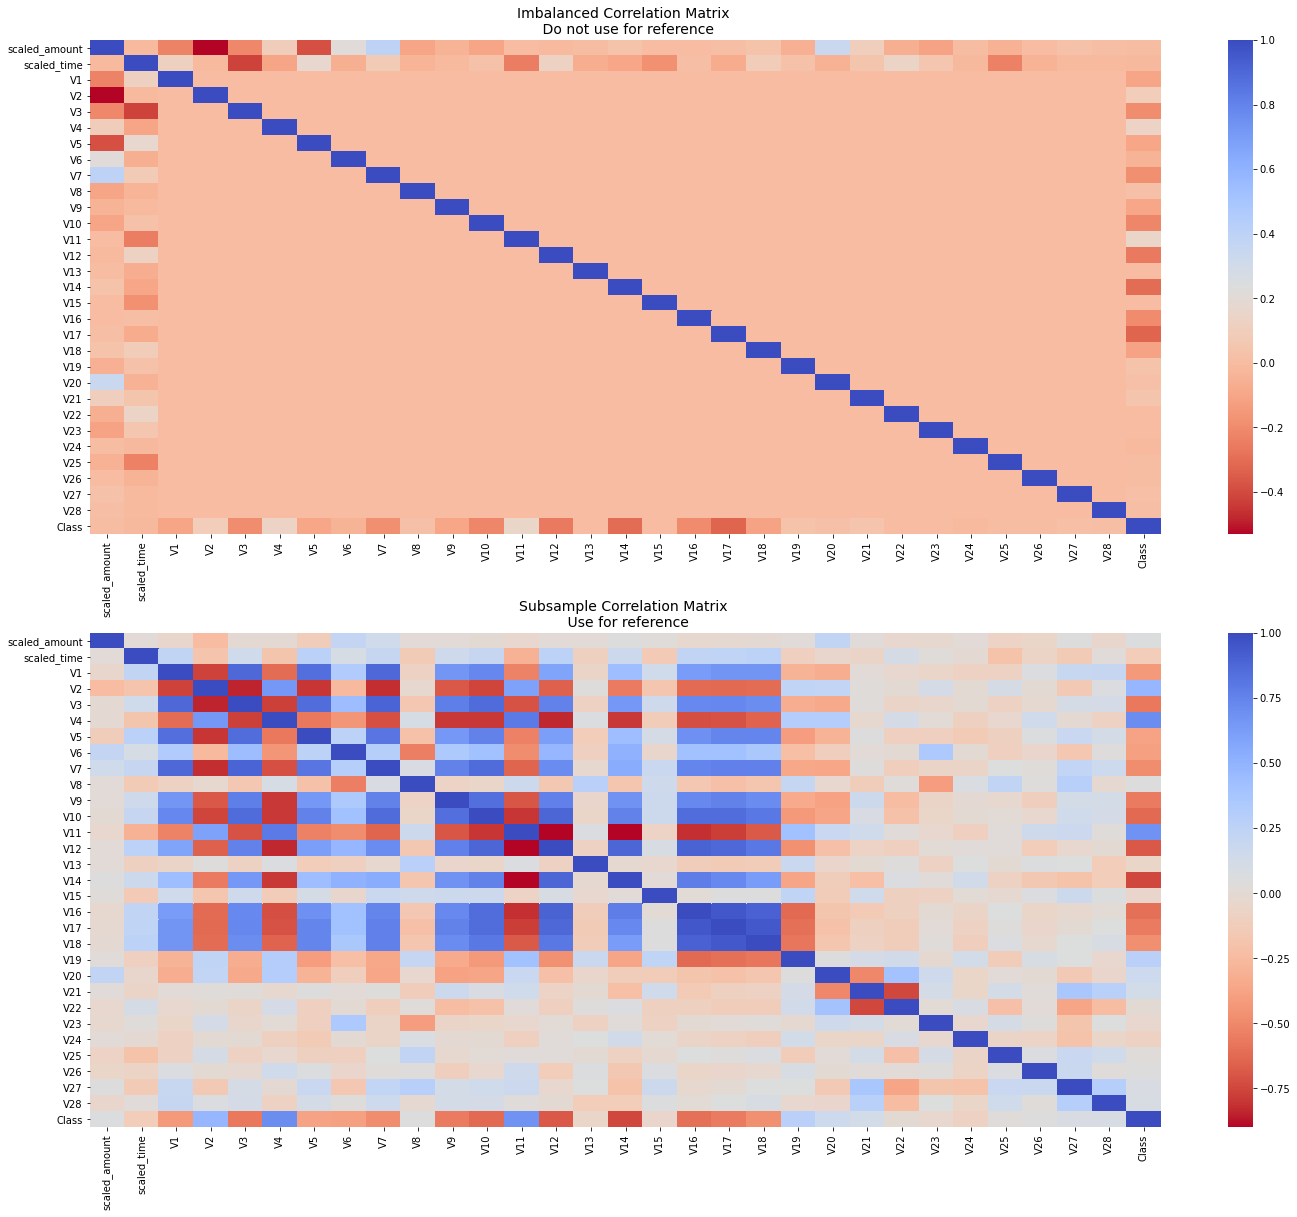

In [22]:
f,(ax1,ax2) = plt.subplots(2,1,figsize=(24,20))

corr=df.corr()
sns.heatmap(corr,cmap='coolwarm_r', annot_kws={'size':20},ax=ax1)
ax1.set_title('Imbalanced Correlation Matrix \n Do not use for reference',fontsize=14)

sub_sample_cor=new_df.corr()
sns.heatmap(sub_sample_cor,cmap='coolwarm_r',annot_kws={'size':20}, ax=ax2)
ax2.set_title('Subsample Correlation Matrix \n Use for reference',fontsize=14)

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction. 

Boxplots give a better understanding of distribution of these features in fraudulent and non-fraudulent transactions.

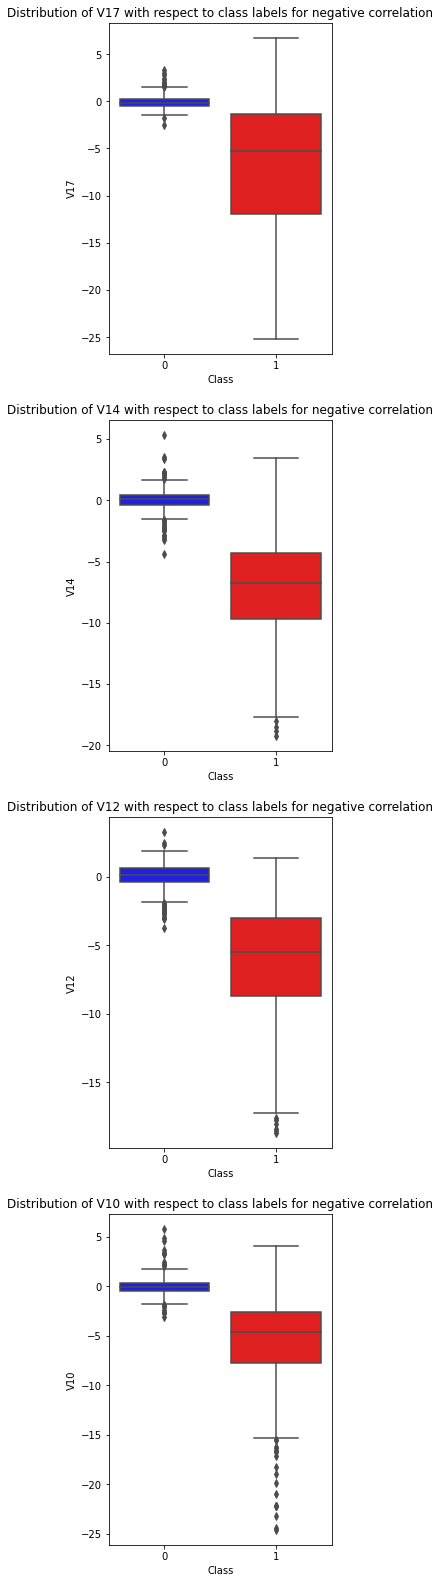

In [23]:
f,axes= plt.subplots(nrows=4,figsize=(4,28))

# Negative correlations with class values (The lower the value, the higher the chances of a fraud transaction)
sns.boxplot(x='Class',y='V17',data=new_df,palette=['b','r'],ax=axes[0])
axes[0].set_title('Distribution of V17 with respect to class labels for negative correlation')

sns.boxplot(x='Class',y='V14',data=new_df,palette=['b','r'],ax=axes[1])
axes[1].set_title('Distribution of V14 with respect to class labels for negative correlation')

sns.boxplot(x='Class',y='V12',data=new_df,palette=['b','r'],ax=axes[2])
axes[2].set_title('Distribution of V12 with respect to class labels for negative correlation')

sns.boxplot(x='Class',y='V10',data=new_df,palette=['b','r'],ax=axes[3])
axes[3].set_title('Distribution of V10 with respect to class labels for negative correlation')

plt.show()

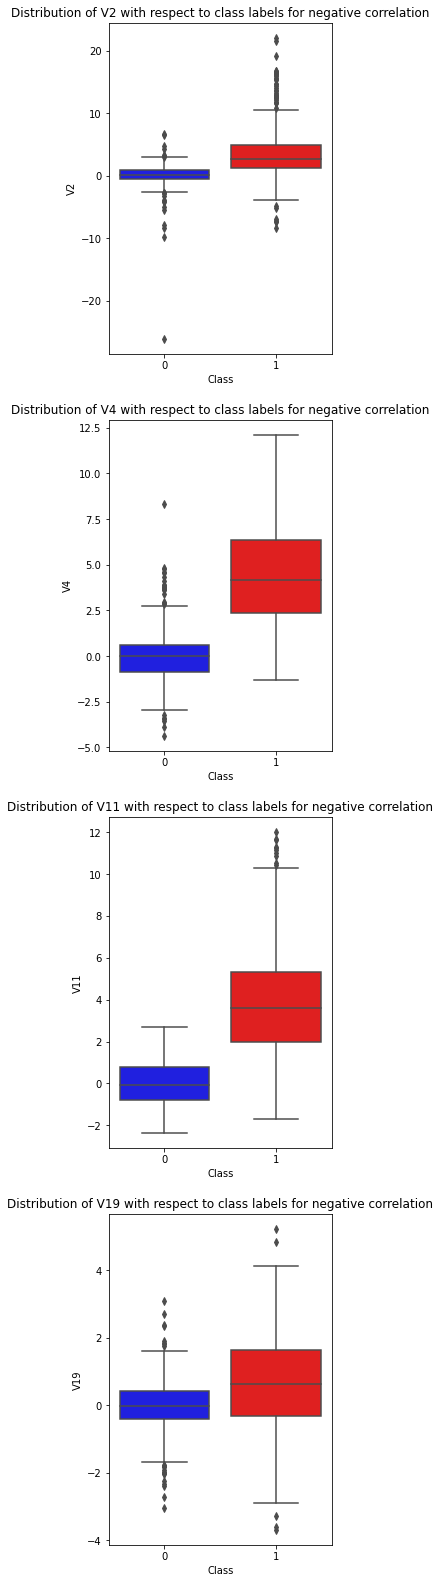

In [24]:
f,axes= plt.subplots(nrows=4,figsize=(4,28))

# Positive correlations with class values (The higher the value, the higher the chances of a fraud transaction)
sns.boxplot(x='Class',y='V2',data=new_df,palette=['b','r'],ax=axes[0])
axes[0].set_title('Distribution of V2 with respect to class labels for negative correlation')

sns.boxplot(x='Class',y='V4',data=new_df,palette=['b','r'],ax=axes[1])
axes[1].set_title('Distribution of V4 with respect to class labels for negative correlation')

sns.boxplot(x='Class',y='V11',data=new_df,palette=['b','r'],ax=axes[2])
axes[2].set_title('Distribution of V11 with respect to class labels for negative correlation')

sns.boxplot(x='Class',y='V19',data=new_df,palette=['b','r'],ax=axes[3])
axes[3].set_title('Distribution of V19 with respect to class labels for negative correlation')

plt.show()

### Anomaly Detection

The extreme outlier values of features that are highly correlated to the response variable need to be removed. It will improve the model accuracy.

There are different ways to do so:


Interquartile Range (IQR): We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.

Boxplots: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).


#### The trade-off

We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.

The Tradeoff: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

In [25]:
from scipy.stats import norm

In [26]:
new_df[new_df['V14']==1]

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class


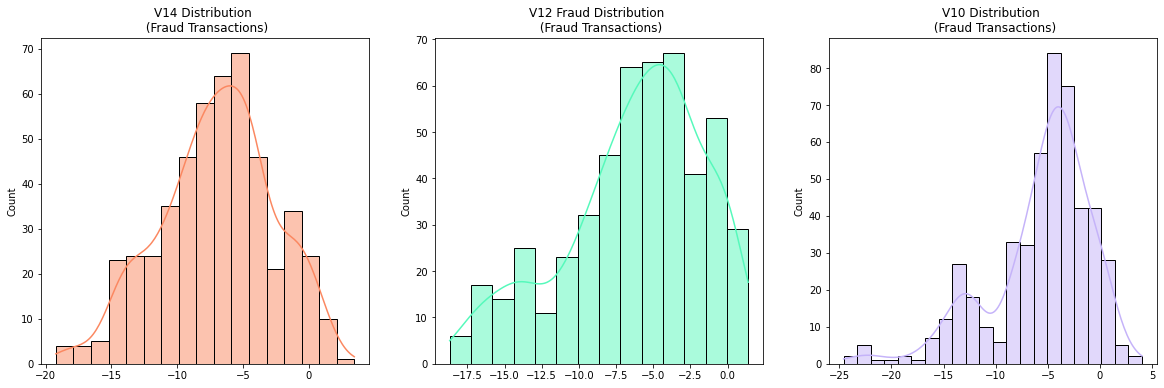

In [27]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))

v14_fraud_dist=new_df['V14'].loc[new_df['Class']==1].values
sns.histplot(v14_fraud_dist,ax=ax1,color='#FB8861',kde=True)
ax1.set_title('V14 Distribution \n (Fraud Transactions)')

v12_fraud_dist=new_df['V12'].loc[new_df['Class']==1].values
sns.histplot(v12_fraud_dist,ax=ax2,color='#56F9BB',kde=True)
ax2.set_title('V12 Fraud Distribution \n (Fraud Transactions)')

v10_fraud_dist=new_df['V10'].loc[new_df['Class']==1].values
sns.histplot(v10_fraud_dist,ax=ax3,color='#C5B3F9',kde=True)
ax3.set_title('V10 Distribution \n (Fraud Transactions)')

plt.show()

V14 is the only feature that has a Gaussian distribution compared to features V12 and V10. 

After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold). 

In [28]:
# Removing outliers for V14 
v14_fraud=new_df['V14'].loc[new_df['Class']==1].values
q25,q75=np.percentile(v14_fraud,25),np.percentile(v14_fraud,75)
print('25th Percentile:{}\n75th Percentile:{}'.format(q25,q75))
v14_iqr=q75-q25
v14_cut_off=v14_iqr*1.5
v14_lower,v14_upper=q25-v14_cut_off,q75+v14_cut_off
print('V14 cut-off:{}'.format(v14_cut_off))
print('V14 lower limit:{}'.format(v14_lower))
print('V14 upper limit:{}'.format(v14_upper))

outliers=[x for x in v14_fraud if x<v14_lower or x>v14_upper ]
print('Number of outliers for fraud cases for feature V14:{}\n'.format(len(outliers)))
print('V14 outliers for fraud cases:{}'.format(outliers))

new_df=new_df.drop(new_df[(new_df['V14']>v14_upper) | (new_df['V14']>v14_upper)].index)
print('---'*40)


# Removing outliers for V12
v12_fraud=new_df['V12'].loc[new_df['Class']==1].values
q25,q75=np.percentile(v12_fraud,25),np.percentile(v12_fraud,75)
v12_iqr=q75-q25
v12_cut_off=v12_iqr*1.5
v12_lower,v12_upper=q25-v12_cut_off,q75+v12_cut_off
print('V12 cut-off:{}'.format(v12_cut_off))
print('V12 lower limit:{}'.format(v12_lower))
print('V12 upper limit:{}'.format(v12_upper))

outliers=[x for x in v12_fraud if x<v12_lower or x>v12_upper]
print('Number of outliers for fraud cases for feature V12:{}\n'.format(len(outliers)))
print('V12 outliers for fraud cases:{}'.format(outliers))

new_df=new_df.drop(new_df[(new_df['V12']>v12_upper) | (new_df['V12']<v12_lower)].index)
print('---'*40)

# Removing outliers for V10
v10_fraud=new_df['V10'].loc[new_df['Class']==1].values
q25,q75=np.percentile(v10_fraud,25),np.percentile(v10_fraud,75)
v10_iqr=q75-q25
v10_cut_off=v10_iqr*1.5
v10_lower,v10_upper=q25-v10_cut_off,q75+v10_cut_off
print('V10 cut-off:{}'.format(v10_cut_off))
print('V10 lower limit:{}'.format(v10_lower))
print('V10 upper limit:{}'.format(v10_upper))

outliers=[x for x in v10_fraud if x<v10_lower or x>v10_upper]
print('Number of outliers for fraud cases for feature V10:{}\n'.format(len(outliers)))
print('V10 outliers for fraud cases:{}'.format(outliers))

new_df=new_df.drop(new_df[(new_df['V10']>v10_upper) | (new_df['V10']<v10_lower)].index)

25th Percentile:-9.692722964972385
75th Percentile:-4.282820849486866
V14 cut-off:8.114853173228278
V14 lower limit:-17.807576138200663
V14 upper limit:3.8320323237414122
Number of outliers for fraud cases for feature V14:4

V14 outliers for fraud cases:[-18.0499976898594, -18.4937733551053, -19.2143254902614, -18.8220867423816]
------------------------------------------------------------------------------------------------------------------------
V12 cut-off:8.571132744641064
V12 lower limit:-17.25930926645337
V12 upper limit:5.597044719256134
Number of outliers for fraud cases for feature V12:6

V12 outliers for fraud cases:[-18.0475965708216, -18.5536970096458, -17.7691434633638, -17.6316063138707, -18.6837146333443, -18.4311310279993]
------------------------------------------------------------------------------------------------------------------------
V10 cut-off:7.476183821140922
V10 lower limit:-14.983879974651355
V10 upper limit:4.952610215057772
Number of outliers for fraud c

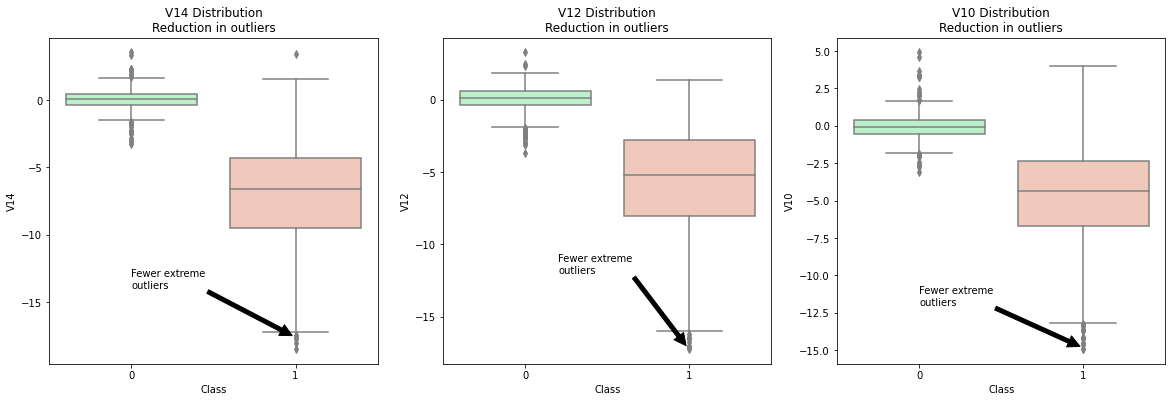

In [29]:
# Plotting boxplots for the above features without the extreme outliers

f, (ax1,ax2,ax3)= plt.subplots(1,3,figsize=(20,6))
colors=['#B3F9C5', '#f9c5b3']

# V14
sns.boxplot(x='Class',y='V14',data=new_df,palette=colors,ax=ax1)
ax1.set_title('V14 Distribution\nReduction in outliers')
ax1.annotate('Fewer extreme\noutliers',xy=(0.98,-17.5),xytext=(0,-14),arrowprops=dict(facecolor='black'))

# V12
sns.boxplot(x='Class',y='V12',data=new_df,palette=colors,ax=ax2)
ax2.set_title('V12 Distribution\nReduction in outliers')
ax2.annotate('Fewer extreme\noutliers',xy=(0.98,-17),xytext=(0.2,-12),arrowprops=dict(facecolor='black'))

# V10
sns.boxplot(x='Class',y='V10',data=new_df,palette=colors,ax=ax3)
ax3.set_title('V10 Distribution\nReduction in outliers')
ax3.annotate('Fewer extreme\noutliers',xy=(0.98,-14.75),xytext=(0,-12),arrowprops=dict(facecolor='black'))

plt.show()

### Dimensionality Reduction and Clustering

In [30]:
#t-SNE Algorithm

X=new_df.drop('Class',axis=1)
y=new_df['Class']

t0=time.time()
X_reduced_tsne=TSNE(n_components=2,random_state=42).fit_transform(X.values)
t1=time.time()
print('T-SNE took {:.2}s'.format(t1-t0))

#PCA algorithm

t0=time.time()
X_reduced_PCA=PCA(n_components=2,random_state=42).fit_transform(X.values)
t1=time.time()
print('PCA took {:.2}s'.format(t1-t0))

# TruncatedSVD

t0=time.time()
X_reduced_svd=TruncatedSVD(n_components=2,random_state=42).fit_transform(X.values)
t1=time.time()
print('TrucatedSVD took {:.2}s'.format(t1-t0))

T-SNE took 3.9s
PCA took 0.074s
TrucatedSVD took 0.005s


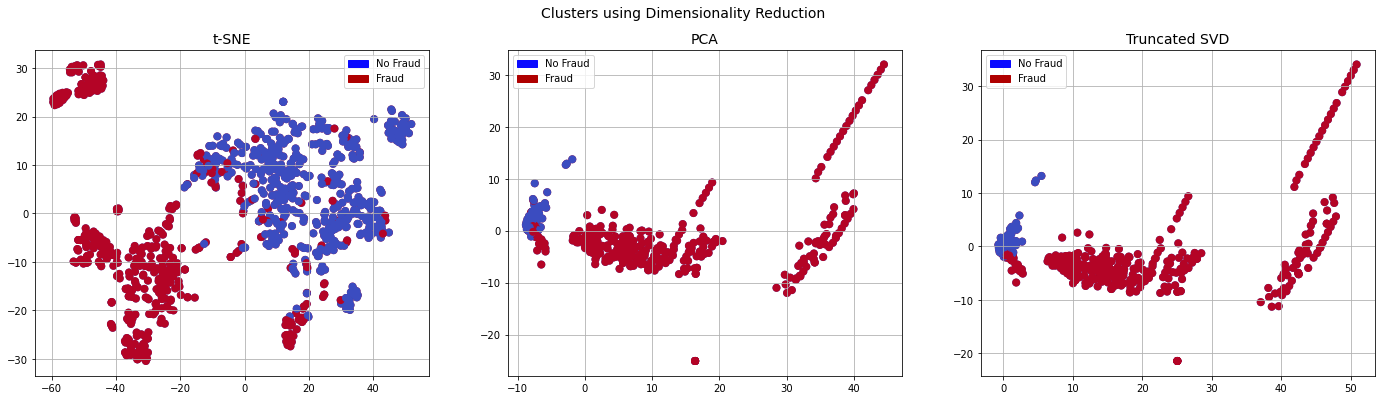

In [31]:
# Plotting clusters obtained through these algorithms

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_PCA[:,0], X_reduced_PCA[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_PCA[:,0], X_reduced_PCA[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

### Comparing performance of classifiers

In [32]:
# Dividing the data into predictors and target
X=new_df.drop('Class',axis=1)
y=new_df['Class']

In [33]:
# Since the data is already scaled, it can be split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
# In order to use the values as inputs, they need to be converted to arrays
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
classifiers={'Logistic Regression':LogisticRegression(),
            'KNN':KNeighborsClassifier(),
            'Support Vector Classifier':SVC(),
             'Decision Tree Classifier':DecisionTreeClassifier()
            }

In [37]:
for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score=cross_val_score(classifier,X_train,y_train,cv=5)
    print('{} has a training accuracy of {}% '.format(key,round(training_score.mean(),2)*100))

Logistic Regression has a training accuracy of 94.0% 
KNN has a training accuracy of 92.0% 
Support Vector Classifier has a training accuracy of 94.0% 
Decision Tree Classifier has a training accuracy of 89.0% 


In [38]:
# Using Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV

In [39]:
# For logistic regression
log_reg_params={'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}

grid_log_reg=GridSearchCV(LogisticRegression(),log_reg_params) # this gives logistic regression with best parameters
grid_log_reg.fit(X_train,y_train)
log_reg=grid_log_reg.best_estimator_

# For KNN
knn_params={'n_neighbors':list(range(2,5,1)),'algorithm':['auto','ball_tree','kd_tree','brute']}

grid_knn=GridSearchCV(KNeighborsClassifier(),knn_params)
grid_knn.fit(X_train,y_train)
knn=grid_knn.best_estimator_

# For support vector classifier
svc_params={'C':[0.5,0.7,0.9,1],'kernel':['rbf','poly','sigmoid','linear']}

grid_svc=GridSearchCV(SVC(),svc_params)
grid_svc.fit(X_train,y_train)
svc=grid_svc.best_estimator_

# For decision tree classifier
dtree_params={'criterion':['gini','entropy'],'max_depth':list(range(2,4,1)),'min_samples_leaf':list(range(5,7,1))}

grid_dtree=GridSearchCV(DecisionTreeClassifier(),dtree_params)
grid_dtree.fit(X_train,y_train)
dtree=grid_dtree.best_estimator_

In [40]:
# Finding out accuracy scores for the best parameter fits
# Logistic Regression
log_reg_score=cross_val_score(log_reg,X_train,y_train,cv=5)
print('Logistic regression has a cross validation score of {}%'.format(round(log_reg_score.mean(),2)*100))

# For KNN
knn_score=cross_val_score(knn,X_train,y_train,cv=5)
print('KNN has a cross validation score of {}%'.format(round(knn_score.mean(),2)*100))

# For Support Vector Classifier
svc_score=cross_val_score(svc,X_train,y_train,cv=5)
print('SVC has a cross validation score of {}%'.format(round(svc_score.mean(),2)*100))

# For Decision Tree Classifier
dtree_score=cross_val_score(dtree,X_train,y_train,cv=5)
print('Decision tree has a cross validation score of {}%'.format(round(dtree_score.mean(),2)*100))

Logistic regression has a cross validation score of 94.0%
KNN has a cross validation score of 94.0%
SVC has a cross validation score of 94.0%
Decision tree has a cross validation score of 92.0%


In [41]:
# Undersampling during cross-validation
undersample_X=df.drop('Class',axis=1)
undersample_y=df['Class']

for train_index,test_index in sss.split(undersample_X,undersample_y):
    print('Train:', train_index, 'Test:', test_index)
    undersample_Xtrain,undersample_Xtest=undersample_X.iloc[train_index],undersample_X.iloc[test_index]
    undersample_ytrain,undersample_ytest=undersample_y.iloc[train_index],undersample_y.iloc[test_index]
    
undersample_Xtrain=undersample_Xtrain.values
undersample_Xtest=undersample_Xtest.values
undersample_ytrain=undersample_ytrain.values
undersample_ytest=undersample_ytest.values

undersample_accuracy=[]
undersample_precision=[]
undersample_recall=[]
undersample_f1=[]
undersample_auc=[]

Train: [ 56953  56954  56955 ... 284804 284805 284806] Test: [    0     1     2 ... 61160 61192 61437]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56953  56954  56955 ... 121818 122277 122520]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113899 113900 113901 ... 173961 175093 175425]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170876 170877 170878 ... 227848 227849 227850]
Train: [     0      1      2 ... 227848 227849 227850] Test: [224662 225758 225861 ... 284804 284805 284806]


In [42]:
# Implementing NearMiss Technique
# Checking the distribution of NearMiss to see how it distributes the labels
X_nearmiss,y_nearmiss=NearMiss().fit_resample(undersample_X.values,undersample_y.values)
print('NearMiss label distribution:{}'.format(Counter(y_nearmiss)))

NearMiss label distribution:Counter({0: 492, 1: 492})


In [43]:
# Cross-validating 
for train,test in sss.split(undersample_Xtrain,undersample_ytrain):
    undersample_pipeline=imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'),log_reg)
    undersample_model=undersample_pipeline.fit(undersample_Xtrain[train],undersample_ytrain[train])
    undersample_prediction=undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test],original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test],undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test],undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test],undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test],undersample_prediction))

### Plotting Learning Curves

In [44]:
from sklearn.model_selection import ShuffleSplit, learning_curve

In [45]:
def plot_learning_curve(estimator1,estimator2,estimator3,estimator4,X,y,ylim=None,cv=None,n_jobs=1,
                        train_sizes=np.linspace(0.1,1,5)):
    f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20,14),sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # Estimator 1
    train_sizes,train_score,test_score=learning_curve(estimator1,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_score,axis=1)
    train_scores_std=np.std(train_score,axis=1)
    test_scores_mean=np.mean(test_score,axis=1)
    test_scores_std=np.std(test_score,axis=1)
    ax1.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='#2492ff')
    ax1.plot(train_sizes,train_scores_mean,'o-',color='#ff9124',label='Training Score')
    ax1.plot(train_sizes,test_scores_mean,'o-',color='#2492ff',label='Cross-Validation Score')
    ax1.set_title('Logistic Regression Learning Curve')
    ax1.set_xlabel('Training Size')
    ax1.set_ylabel('Score')
    ax1.grid()
    #ax1.legend()
    
    # Estimator 2
    train_sizes,train_score,test_score=learning_curve(estimator2,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_score,axis=1)
    train_scores_std=np.std(train_score,axis=1)
    test_scores_mean=np.mean(test_score,axis=1)
    test_scores_std=np.std(test_score,axis=1)
    ax2.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='#2492ff')
    ax2.plot(train_sizes,train_scores_mean,'o-',color='#ff9124',label='Training Score')
    ax2.plot(train_score,test_scores_mean,'o-',color='#2492ff',label='Cross-Validation Score')
    ax2.set_title('KNN Learning Curve')
    ax2.set_xlabel('Training Size')
    ax2.set_ylabel('Score')
    ax2.grid()
    #ax2.legend()
    
    # Estimator 3
    train_sizes,train_score,test_score=learning_curve(estimator3,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_score,axis=1)
    train_scores_std=np.std(train_score,axis=1)
    test_scores_mean=np.mean(test_score,axis=1)
    test_scores_std=np.std(test_score,axis=1)
    ax3.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='#2492ff')
    ax3.plot(train_sizes,train_scores_mean,'o-',color='#ff9124',label='Training Score')
    ax3.plot(train_score,test_scores_mean,'o-',color='#2492ff',label='Cross-Validation Score')
    ax3.set_title('Support Vector Classifier Learning Curve')
    ax3.set_xlabel('Training Size')
    ax3.set_ylabel('Score')
    ax3.grid()
    #ax3.legend()
    
    # Estimator 4
    train_sizes,train_score,test_score=learning_curve(estimator4,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_score,axis=1)
    train_scores_std=np.std(train_score,axis=1)
    test_scores_mean=np.mean(test_score,axis=1)
    test_scores_std=np.std(test_score,axis=1)
    ax4.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='#2492ff')
    ax4.plot(train_sizes,train_scores_mean,'o-',color='#ff9124',label='Training Score')
    ax4.plot(train_sizes,test_scores_mean,'o-',color='#2492ff',label='Cross-Validation Score')
    ax4.set_title('Decision Tree Classifier Learning Curve')
    ax4.set_xlabel('Training Size')
    ax4.set_ylabel('Score')
    ax4.grid()
    #ax4.legend()
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\spars\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

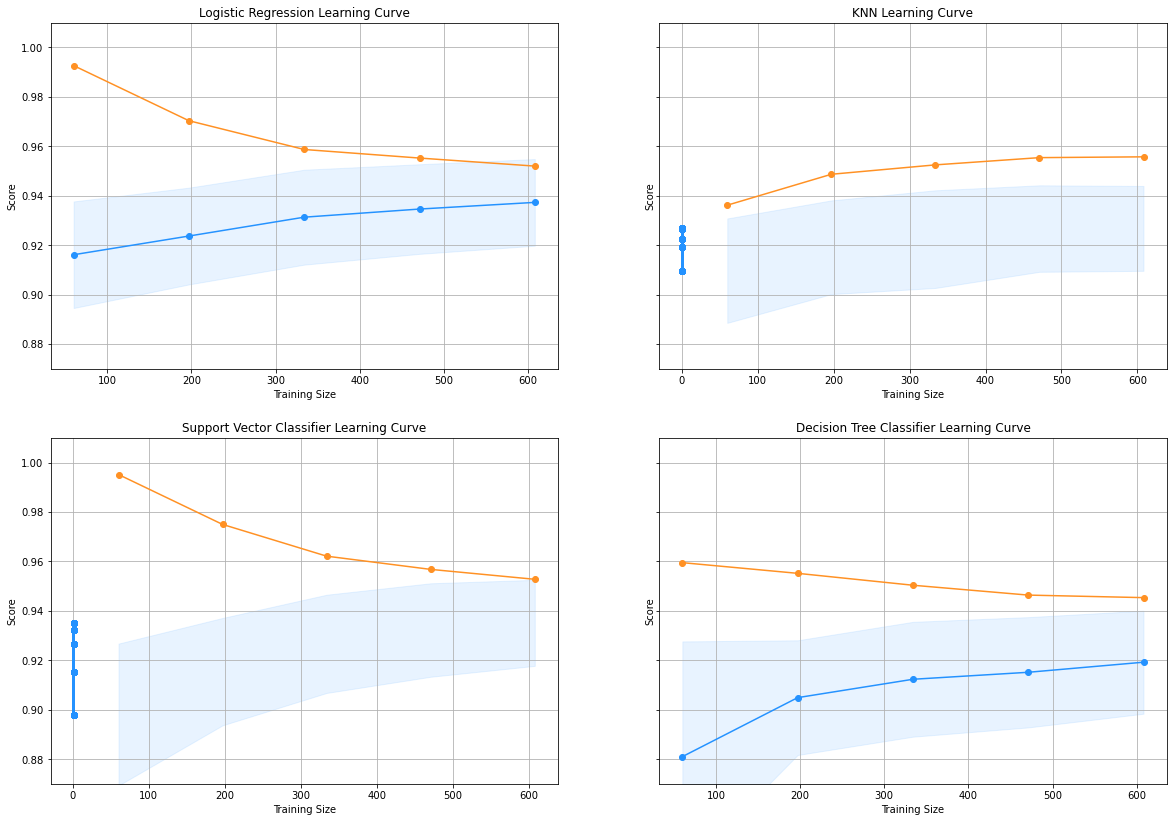

In [46]:
cv=ShuffleSplit(n_splits=100,test_size=0.2,random_state=42)
plot_learning_curve(log_reg,knn,svc,dtree,X_train,y_train,(0.87,1.01),cv=cv,n_jobs=4)

### Plotting ROC Curves for the Classifiers

In [47]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

In [48]:
# Creating an array with scores of the classifiers so that they can be used in roc_auc_score
log_reg_pred=cross_val_predict(log_reg,X_train,y_train,cv=5,method='decision_function')
knn_pred=cross_val_predict(knn,X_train,y_train,cv=5)
svc_pred=cross_val_predict(svc,X_train,y_train,cv=5,method='decision_function')
dtree_pred=cross_val_predict(dtree,X_train,y_train,cv=5)

In [49]:
from sklearn.metrics import roc_auc_score

In [50]:
print('Logistic Regression: ',roc_auc_score(y_train,log_reg_pred))
print('KNN: ',roc_auc_score(y_train,knn_pred))
print('Support Vector Classifier: ',roc_auc_score(y_train,svc_pred))
print('Decision Tree Classifier: ',roc_auc_score(y_train,dtree_pred))

Logistic Regression:  0.9734585771908997
KNN:  0.9343094578551642
Support Vector Classifier:  0.9711605884517387
Decision Tree Classifier:  0.9244163039176888


In [51]:
log_fpr,log_tpr,log_treshold=roc_curve(y_train,log_reg_pred)
knn_fpr,knn_tpr,knn_treshold=roc_curve(y_train,knn_pred)
svc_fpr,svc_tpr,svc_treshold=roc_curve(y_train,svc_pred)
dtree_fpr,dtree_tpr,dtree_treshold=roc_curve(y_train,dtree_pred)

In [52]:
def graph_roc_curve_multiple(log_fpr,log_tpr,knn_fpr,knn_tpr,svc_fpr,svc_tpr,dtree_fpr,dtree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve\nThe 4 Classifiers')
    plt.plot(log_fpr,log_tpr,label='Logistic Regression Score:{:.4f}'.format(roc_auc_score(y_train,log_reg_pred)))
    plt.plot(knn_fpr,knn_tpr,label='KNN Score:{:.4f}'.format(roc_auc_score(y_train,knn_pred)))
    plt.plot(svc_fpr,svc_tpr,label='Supoort Vector Classifier Score:{:.4f}'.format(roc_auc_score(y_train,svc_pred)))
    plt.plot(dtree_fpr,dtree_tpr,label='Decision Tree Classifier Score:{:.4f}'.format(roc_auc_score(y_train,svc_pred)))
    plt.plot([0,1],[0,1],'k--')
    plt.axis([-0.01,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('False Negative Rate')
    plt.annotate('Minimum Score of 50%\n(This is the minimum score to get) ',xy=(0.5,0.5),xytext=(0.6,0.3),
                arrowprops={'facecolor':'#6E726D','shrink':0.05})
    plt.legend()

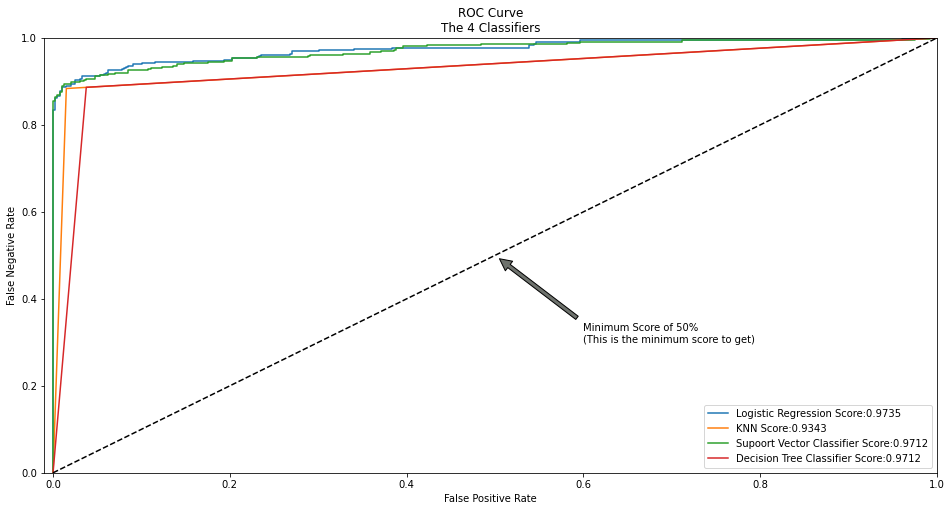

In [53]:
graph_roc_curve_multiple(log_fpr,log_tpr,knn_fpr,knn_tpr,svc_fpr,svc_tpr,dtree_fpr,dtree_tpr)
plt.show()

In [54]:
from sklearn.metrics import precision_recall_curve

In [55]:
precision,recall,threshold=precision_recall_curve(y_train,log_reg_pred)

In [56]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score

In [57]:
y_pred=log_reg.predict(X_train)

# Case of overfitting the data
print('Overfitting:\n')
print('Recall Score: {:.2f}'.format(recall_score(y_train,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train,y_pred)))
print('f1 Score: {:.2f}'.format(f1_score(y_train,y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train,y_pred)))
print()
print('Actual values:\n')
print('Recall Score: {:.2f}'.format(np.mean(undersample_recall)))
print('Precision Score: {:.2f}'.format(np.mean(undersample_precision)))
print('f1 Score: {:.2f}'.format(np.mean(undersample_f1)))
print('Accuracy Score: {:.2f}'.format(np.mean(undersample_accuracy)))

Overfitting:

Recall Score: 0.94
Precision Score: 0.65
f1 Score: 0.77
Accuracy Score: 0.74

Actual values:

Recall Score: 0.33
Precision Score: 0.00
f1 Score: 0.00
Accuracy Score: 0.60


In [58]:
undersample_y_score=log_reg.decision_function(original_Xtest)

In [59]:
from sklearn.metrics import average_precision_score

In [60]:
undersample_average_precision=average_precision_score(original_ytest,undersample_y_score)
print('Average Precision-Recall Score:{:.2f}'.format(undersample_average_precision))

Average Precision-Recall Score:0.04


In [61]:
from sklearn.metrics import precision_recall_curve

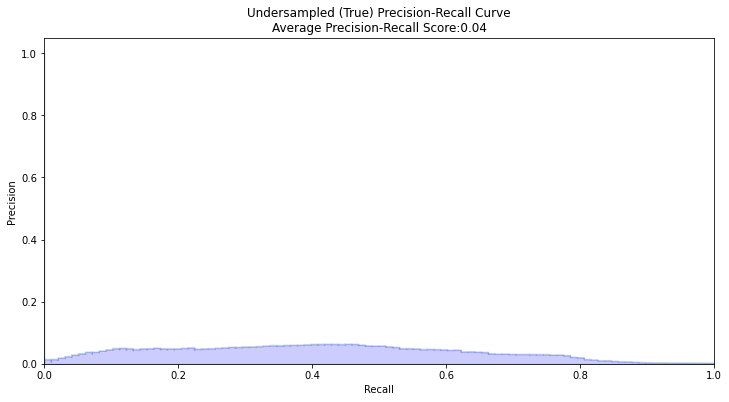

In [62]:
precision,recall,_=precision_recall_curve(original_ytest,undersample_y_score)
fig=plt.figure(figsize=(12,6))
plt.step(recall,precision,color='#004a93',alpha=0.2,where='post')
plt.fill_between(recall,precision,color='b',alpha=0.2,step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('Undersampled (True) Precision-Recall Curve\nAverage Precision-Recall Score:{:.2f}'
         .format(undersample_average_precision))
plt.show()

### Understanding SMOTE

SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

Understanding SMOTE:

    Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
    Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
    Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
    Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

### Overfitting during cross-validation

 if we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before,

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [67]:
print('Length of X_train:{} | Length of y_train:{}'.format(len(original_Xtrain),len(original_ytrain)))
print('Length of X_test:{} | Length of y_test:{}'.format(len(original_Xtest),len(original_ytest)))

accuracy_lst=[]
precision_lst=[]
recall_lst=[]
f1_lst=[]
auc_lst=[]

# Logistic Regression classifier with optimal parameters
log_reg_sm=LogisticRegression()
rand_log_reg=RandomizedSearchCV(log_reg_sm,log_reg_params,n_iter=4)

# IMPLEMENTING SMOTE TECHNIQUE
log_reg_params={'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
for train, test in sss.split(original_Xtrain,original_ytrain):
    pipeline=imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'),rand_log_reg)
    # Applying SMOTE during cross-validation
    model=pipeline.fit(original_Xtrain[train],original_ytrain[train])
    best_est=rand_log_reg.best_estimator_
    prediction=best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test],original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test],prediction))
    recall_lst.append(recall_score(original_ytrain[test],prediction))
    f1_lst.append(f1_score(original_ytrain[test],prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test],prediction))
    
print('\n'*2)

print('accuracy:{:.2f}'.format(np.mean(accuracy_lst)))
print('precision:{:.2f}'.format(np.mean(precision_lst)))
print('recall:{:.2f}'.format(np.mean(recall_lst)))
print('f1 score:{:.2f}'.format(np.mean(f1_lst)))

Length of X_train:227846 | Length of y_train:227846
Length of X_test:56961 | Length of y_test:56961



accuracy:0.97
precision:0.06
recall:0.91
f1 score:0.11


In [70]:
labels=['No Fraud','Fraud']
smote_prediction=best_est.predict(original_Xtest)
print(classification_report(original_ytest,smote_prediction,target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.10      0.86      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [72]:
y_score=best_est.decision_function(original_Xtest)

In [73]:
average_precision=average_precision_score(original_ytest,y_score)
print('Average precision-recall score:{:.2f}'.format(average_precision))

Average precision-recall score:0.70


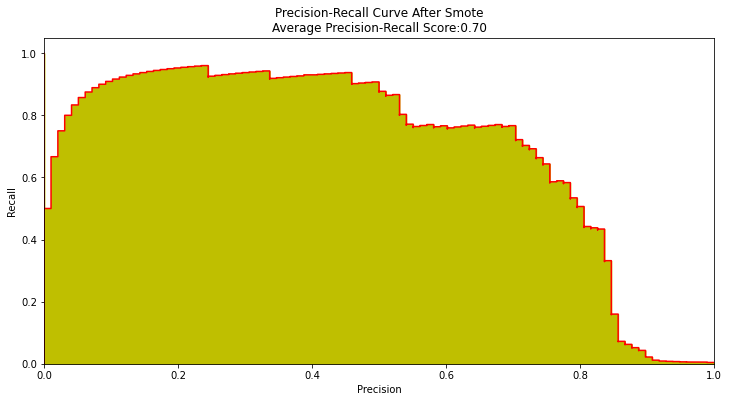

In [84]:
fig=plt.figure(figsize=(12,6))
precision,recall,_=precision_recall_curve(original_ytest,y_score)
plt.step(recall,precision,color='r',where='post')
plt.fill_between(recall,precision,step='post',color='y')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('Precision-Recall Curve After Smote\nAverage Precision-Recall Score:{:.2f}'.format(average_precision))
plt.show()

In [87]:
# SMOTE after splitting and cross-validation
sm=SMOTE(sampling_strategy='minority',random_state=42)

# This will be the training data
Xsm_train,ysm_train=sm.fit_resample(original_Xtrain,original_ytrain)

In [88]:
# Implementing GridsearchCV and other models
t0=time.time()
log_reg_sm=grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train,ysm_train)
t1=time.time()
print('Fitting oversampled data took {:.3f} sec'.format(t1-t0))

Fitting oversampled data took 4.185 sec


### Testing Data With Logistic Regression and Comparing Confusion Matrix For Different Classifiers

In [89]:
from sklearn.metrics import confusion_matrix

In [101]:
# Fitting the logistic regression trained on oversampled data
y_pred_log_reg=log_reg_sm.predict(X_test)

# Fitting other models trained on the undersampled data
y_pred_knn=knn.predict(X_test)
y_pred_svc=svc.predict(X_test)
y_pred_dtree=dtree.predict(X_test)

log_reg_cf=confusion_matrix(y_test,y_pred_log_reg)
knn_cf=confusion_matrix(y_test,y_pred_knn)
svc_cf=confusion_matrix(y_test,y_pred_svc)
dtree_cf=confusion_matrix(y_test,y_pred_dtree)

In [102]:
print(log_reg_cf)
print(knn_cf)
print(svc_cf)
print(dtree_cf)

[[90  1]
 [ 9 91]]
[[90  1]
 [13 87]]
[[90  1]
 [ 9 91]]
[[90  1]
 [12 88]]


In [ ]:
# Plotting confusion matrix as heatmaps for the classifiers
'''fig,ax=plt.subplots(2,2,figsize=(22,12))
sns.heatmap(log_reg_cf,ax=ax[0][0],annot=True,cmap=plt.cm.copper)
ax[0][0].set_title('Logistic Regression\nConfusion Matrix')
ax[0][0].set_xticklabels(['',''],rotation=90)
ax[0][0].set_yticklabels(['',''],rotation=360)

sns.heatmap(knn_cf,annot=True,cmap=plt.cm.copper)
ax[0][1].set_title('KNN\nConfusion Matrix')
ax[0][1].set_xticklabels(['',''],rotation=90)
ax[0][1].set_yticklabels(['',''],rotation=360)

sns.heatmap(svc_cf,annot=True,cmap=plt.cm.copper)
ax[1][0].set_title('Support Vector Classifier\nConfusion Matrix')
ax[1][0].set_xticklabels(['',''],rotation=90)
ax[1][0].set_yticklabels(['',''],rotation=360)

sns.heatmap(dtree_cf,annot=True,cmap=plt.cm.copper)
ax[1][1].set_title('Decision Tree Classifier\nConfusion Matrix')
ax[1][1].set_xticklabels(['',''],rotation=90)
ax[1][1].set_yticklabels(['',''],rotation=360)

plt.show()'''

In [96]:
from sklearn.metrics import classification_report

In [103]:
print('Logistic Regression:')
print(classification_report(y_test,y_pred_log_reg))

print('KNN:')
print(classification_report(y_test,y_pred_knn))

print('Support Vector Classifier:')
print(classification_report(y_test,y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test,y_pred_dtree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        91
           1       0.99      0.91      0.95       100

    accuracy                           0.95       191
   macro avg       0.95      0.95      0.95       191
weighted avg       0.95      0.95      0.95       191

KNN:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        91
           1       0.99      0.87      0.93       100

    accuracy                           0.93       191
   macro avg       0.93      0.93      0.93       191
weighted avg       0.93      0.93      0.93       191

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        91
           1       0.99      0.91      0.95       100

    accuracy                           0.95       191
   macro avg       0.95      0.95      0.95       191
weighted avg       0.